In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import math
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets, metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from scipy import interp
from itertools import cycle

import tensorflow as tf
from tensorflow.keras import layers
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import keras.backend as K

from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

Using TensorFlow backend.


## DNN Classifier

SKLearn is not a specialist in implementing complex neural networks. Instead, it allows you to create one simple kind - the vanilla flavor. For us, this could be plenty complex in order to model changes, but should you want to have more control over facets of the process like mixed activation functions, convolution, recurrence, linked layers, etc., you must use some more complex packages like Google's TensorFlow.

Let's start just by creating some simple networks for a classifier.

In [4]:
Xs, y = datasets.make_classification(n_samples=2000, n_features=5)
model = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu', solver='adam', verbose=True,
                     max_iter = 3000)

We can fit data just as before with our previous algorithms. For example, a simple Test/Train fit can be done like the following.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3)
model.fit(X_train,y_train)

Iteration 1, loss = 0.75249131
Iteration 2, loss = 0.73897285
Iteration 3, loss = 0.72606989
Iteration 4, loss = 0.71459672
Iteration 5, loss = 0.70407943
Iteration 6, loss = 0.69459053
Iteration 7, loss = 0.68560018
Iteration 8, loss = 0.67667662
Iteration 9, loss = 0.66727271
Iteration 10, loss = 0.65715277
Iteration 11, loss = 0.64622008
Iteration 12, loss = 0.63430390
Iteration 13, loss = 0.62123605
Iteration 14, loss = 0.60712110
Iteration 15, loss = 0.59153534
Iteration 16, loss = 0.57462847
Iteration 17, loss = 0.55624409
Iteration 18, loss = 0.53636181
Iteration 19, loss = 0.51496863
Iteration 20, loss = 0.49230917
Iteration 21, loss = 0.46884930
Iteration 22, loss = 0.44456257
Iteration 23, loss = 0.41986965
Iteration 24, loss = 0.39504518
Iteration 25, loss = 0.36994724
Iteration 26, loss = 0.34477006
Iteration 27, loss = 0.32011987
Iteration 28, loss = 0.29586796
Iteration 29, loss = 0.27253991
Iteration 30, loss = 0.24988740
Iteration 31, loss = 0.22856117
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [6]:
print(model.score(X_test,y_test))

0.9933333333333333


So what exactly just happened?

We can recall the structure of the neural net looked something like:

$$input: (5) - relu(10) - relu(10) - output: softmax(2)$$.

Let's examine a little closer what this does.

## Relu

In [7]:
x = np.linspace(-5,5,100)
y = list(map(lambda x: max(0,x), x))

[Text(0, 0.5, 'output'),
 Text(0.5, 0, 'input'),
 Text(0.5, 1.0, 'ReLu - Rectified Linear Unit')]

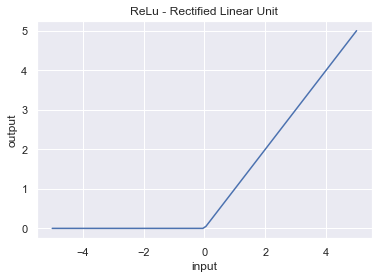

In [8]:
sns.lineplot(x=x,y=y).set(title='ReLu - Rectified Linear Unit',xlabel='input',ylabel='output')

This is coming to be accepted as the best activation function for much of deep learning - the Sigmoid and Tanh suffer from issues that can make neurons evaluated close to zero, look into the vanishing gradient problem for more. However, ReLu is not without issue. It is unlikely you will come across this in our projects, but there is the potential for ReLU cells to 'die' where they evaluate closs to zero for all inputs. This can be solved using something like the ELU or Leaky Relu, where the negative side has a small negative slope that forces the model to continue to pay attention to its value.

## Softmax

The softmax function is the almost exclusive choice for the final layer of categorical classifying dense neural networks as it takes the values of the final layer and calculates probabilities for each of the classes. We will not worry about the computation, since we will likely not end up changing this. In fact, SKLearn does not even give the option to change it in the MLP models.

## Optimization
Optimization in neural networks is the same principal as linear regression! It may seem strange, but if you imagine a series of our weights and biases as being the axes on the heatmap we saw a few weeks ago, a similar process can be performed to find the global maximum - or the point at which we minimize our loss function.

## Loss Functions
Loss in neural networks is the function that is used to calculate how well we are performing on our data either with regard to predicting classes or regression values. We have a few different function to consider. Hinge Loss is slightly faster, but Log-Loss (Categorical Cross-Entropy) is more accurate. There are others, but these are two of the main functions.

[Text(0, 0.5, 'Loss'),
 Text(0.5, 0, 'Predicted Probability'),
 Text(0.5, 1.0, 'Hing Loss: For Negative Class')]

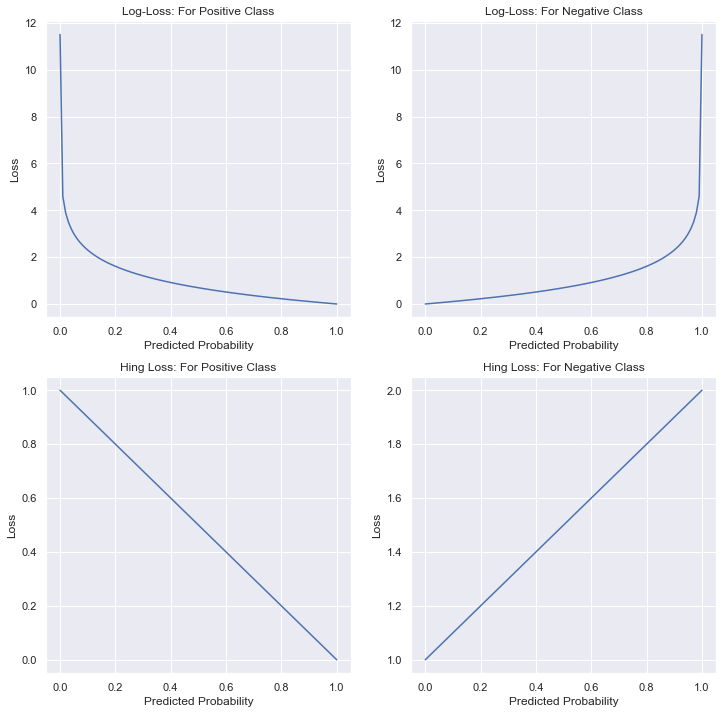

In [9]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12,12))
x = np.linspace(0.00001,.99999,100).tolist()

y = list(map(lambda x:-1*math.log(x), x))
sns.lineplot(x=x, y=y, ax=axs[0][0]).set(title='Log-Loss: For Positive Class',
                                     xlabel='Predicted Probability',ylabel='Loss')
y = list(map(lambda x:-1*math.log(1-x), x))
sns.lineplot(x=x, y=y, ax=axs[0][1]).set(title='Log-Loss: For Negative Class',
                                     xlabel='Predicted Probability',ylabel='Loss')
y = list(map(lambda x: max(0, 1-x), x))
sns.lineplot(x=x, y=y, ax=axs[1][0]).set(title='Hing Loss: For Positive Class',
                                     xlabel='Predicted Probability',ylabel='Loss')
y = list(map(lambda x: max(0, 1+x), x))
sns.lineplot(x=x, y=y, ax=axs[1][1]).set(title='Hing Loss: For Negative Class',
                                     xlabel='Predicted Probability',ylabel='Loss')

## DNN Regression

For regression we have two main options - the first being the same as for in regression and the second being very similar. The Mean Squared Error (MSE) is excellent for cases of minimal outliers, but if your data does have this sort of issue, the Mean Absolute Error (MAE) is less sensitive to their impact.

/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization h

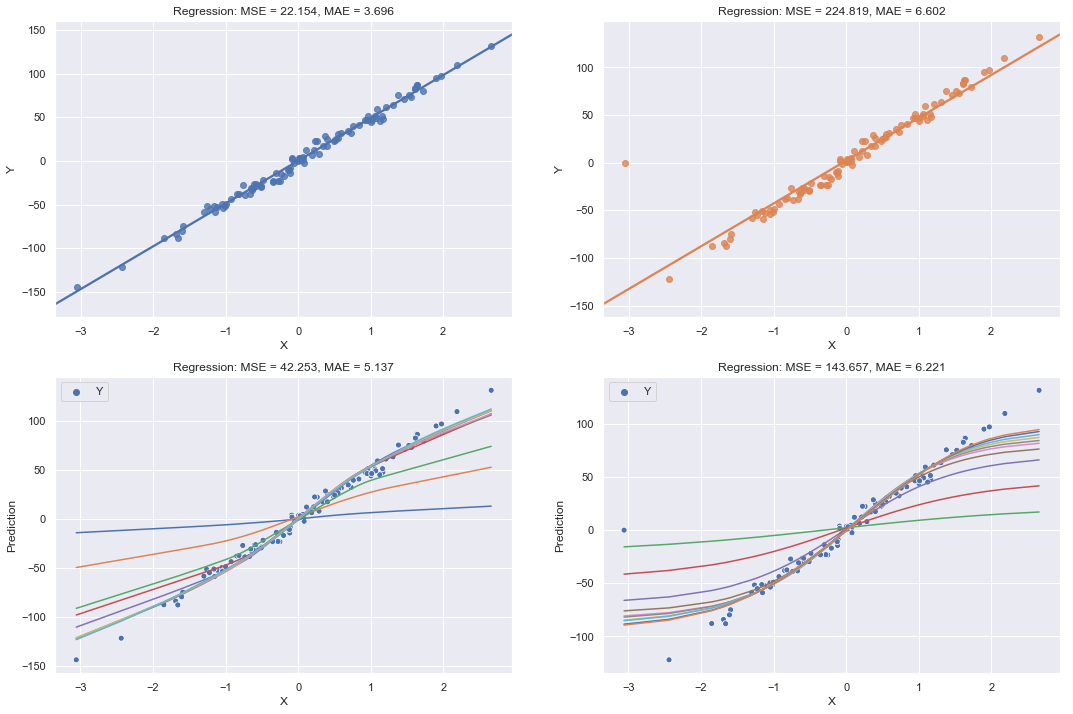

In [11]:
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=5)
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(18,12))

reg = LinearRegression()
reg.fit(x,y)
pred = reg.predict(x)
mse = str(metrics.mean_squared_error(pred,y).round(3))
mae = str(metrics.mean_absolute_error(pred,y).round(3))
title = 'Regression: MSE = '+mse+', MAE = '+mae
sns.regplot(x,y,ax=axs[0][0],ci=None).set(title=title,xlabel='X',ylabel='Y')

names=[]
sns.scatterplot(data=pd.DataFrame({'Y':y},index=x.flatten()), ax = axs[1][0])
for i in range(10):
    mlpr = MLPRegressor(max_iter=(i+1)*200,activation='relu',)
    mlpr.fit(np.array(x).reshape(-1, 1),y)
    pred = mlpr.predict(np.array(x).reshape(-1, 1))
    names.append(str((i+1)*200)+' Iteration Line')
    sns.lineplot(data=pd.DataFrame({'Prediction':pred,'X':x.flatten()}),ax = axs[1][0],x='X',y='Prediction')
mse = str(metrics.mean_squared_error(pred,y).round(3))
mae = str(metrics.mean_absolute_error(pred,y).round(3))
title = 'Regression: MSE = '+mse+', MAE = '+mae
axs[1][0].set_title(title)

_, ind = min((_, idx) for (idx, _) in enumerate(y))
y[ind] = 0

reg = LinearRegression()
reg.fit(x,y)
pred = reg.predict(x)
mse = str(metrics.mean_squared_error(pred,y).round(3))
mae = str(metrics.mean_absolute_error(pred,y).round(3))
title = 'Regression: MSE = '+mse+', MAE = '+mae
sns.regplot(x,y,ax=axs[0][1],ci=None).set(title=title,xlabel='X',ylabel='Y')

names=[]
sns.scatterplot(data=pd.DataFrame({'Y':y},index=x.flatten()), ax = axs[1][1])
for i in range(10):
    mlpr = MLPRegressor(max_iter=(i+1)*200,activation='tanh')
    mlpr.fit(np.array(x).reshape(-1, 1),y)
    pred = mlpr.predict(np.array(x).reshape(-1, 1))
    names.append(str((i+1)*200)+' Iteration Line')
    sns.lineplot(data=pd.DataFrame({'Prediction':pred,'X':x.flatten()}), ax = axs[1][1],x='X',y='Prediction')
mse = str(metrics.mean_squared_error(pred,y).round(3))
mae = str(metrics.mean_absolute_error(pred,y).round(3))
title = 'Regression: MSE = '+mse+', MAE = '+mae
axs[1][1].set_title(title)
plt.show()

We would however like to have more control over the details in the model, as well as access to different combinations of layers, and the ability to create recurrent and convolution layers, the details of which we will cover in another session. For the time being, let's investigate the TensorFlow and Keras implementation to build Dense Neural Networks.

## Keras Sequential Structure
Let's go ahead and build the exact same thing, just in a slightly different way. In Keras, we can declare an ordered series of layers (input, hidden, ouput) to create a model. Within keras, there a pre-packaged layers that allow you to do everything from a simple neural net up to convolutional image recognition.

We will first call a method to create a Sequential series of layers. Then, to this we will pass a list of our layers, starting with a dense layer with inputs equal to the dimensions of our inputs. After this, you can pass any series of dense, convolutional, or recurrent layers. Let's focus on the former for now.

In [12]:
Xs, y = datasets.make_classification(n_samples=2000, n_features=5)
print('X:',np.array(Xs).shape,' Y:',np.array(y).shape)

X: (2000, 5)  Y: (2000,)


Instructions for updating:
Colocations handled automatically by placer.


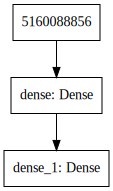

In [13]:
model = tf.keras.Sequential([layers.Dense(10, activation='linear', input_shape=(5,)),
                             layers.Dense(2, activation='softmax')])
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Using this model above, reference the documentation to create a layer sequence of

$$Input: 5,\ ReLU:10,\ Sigmoid:5,\ TanH: 2,\ Softmax: 2$$

In [16]:
model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(5,)),
                             layers.Dense(5, activation='sigmoid'),
                             layers.Dense(2, activation='tanh'),
                             layers.Dense(2, activation='softmax')])

## Compiling a Model
Now that we can assemble a series of layers into a Dense Neural Network (DNN) there are a few more decisions that you must make: the loss function and your accuracy metric. There are hundreds of potential combinations of values for this, so it comes down to selecting the option that best fits your problem _and_ data. Just a few things to take into account are the impact of false positives, the impact of false negatives, the amount of data, if the response variable is categorical, how much time you have to train, and more.

### Regression

Mean Squared Error: $\frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$

Mean Absolute Error: $\frac{1}{n}\sum_{i=1}^{n}|y-\hat{y}|$

Mean Absolute Percentage Error: $\frac{100\%}{n}\sum_{i=1}^{n} | \frac{(y-\hat{y})}{y}|$

### Categorical

Cross-Entropy: $−(y\log(p)+(1−y)\log(1−p))$

As we discussed some above, the mean absolute error is more forgiving of outlier values than the mean squared error, the usual function. The mean absolute percentage error is used less often, but is read in terms of a percentage. This means that there is a maximum downside percentage error of $100$ but the upside error is infinite.

However, before we can compile the model, there is one final decision we have to make. By what function would we like the algorithm to attempt to minimize the loss by? In other words, how should the weights and biases be wiggled to achieve maximum performance (minimal loss).

There are many, but we will select a few.

### RMSProp
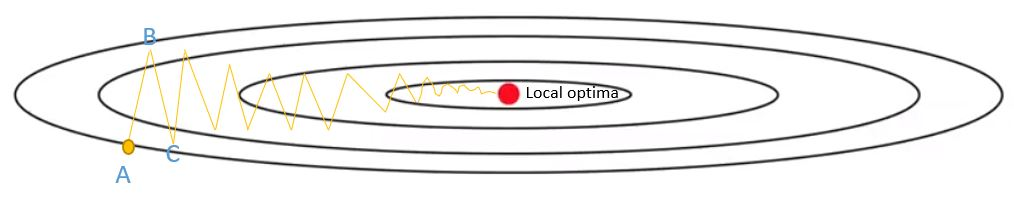

As we move towards the optimal point, the weights will bounce the point towards the right and the biases up and down. Using this, we can converge on the optimal point.

Using a larger learning rate will cause the vertical oscillation to have higher magnitudes. This slows down our gradient descent and prevents using a much larger learning rate.

### Adam
As with all of the optimizers, we are trying to solve the gradient descent problem, finding a minimum loss value in the space with dimensions equal to our weights and biases. In other words, this function loss, we would like to minimize it by solving which weights and biases should have what values. In this optimizer, we continually change the values by a smaller and smaller amount until we converge on the best value.

Adam is the same as the above, but with the ability to know how the hill is behaving (the second derivative) to speed up down a steep part of the space and slow down as is shallows out to prevent over running and having to roll back.

The math behind these is highly complex, so we will only touch briefly. https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/ is a great article to learn moer if you are interested.

## Categorical Compiling
Now, let's compile our cmodel!

In [17]:
#Two Classes
model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(5,)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(2, activation='softmax')])
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy)

In [18]:
#Five Classes
model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(5,)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(5, activation='softmax')])
model.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy)

## Regression Compiling
We know that we must use the softmax layer for categorical variables, because our actualy goal in those cases is to get class probabilities to be able to choose decision boundaries that maximize our ability to predict in a way that maximizes our chosen metric - which will be the next discussion. In this case, since we are not trying to predict a probability, we would simply like to ask for a continuous value. This can be done by simply requesting a weighted average of the final layer in a 'linear' activation - i.e. a linear regression layer.

In [ ]:
#Mean Squared Error
model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(5,)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(1, activation='linear')])
model.compile(optimizer='adam',loss=tf.keras.losses.mean_squared_error)

In [ ]:
#Mean Absolute Error
model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(5,)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(1, activation='linear')])
model.compile(optimizer='adam',loss=tf.keras.losses.mean_absolute_error)

## Fitting a Model
Finally, now that we have a compiled, ready-to-go model, the final step is to train it. In SKLearn, this was as simple as executing the .fit() method. In Keras this is slightly more complicated. We must first decide for how long we would like to fit our model (in epochs, or one run through the training data). We can also decide on the metrics we would like to record.

Note, that you can ONLY pass numpy arrays. No DataFrames.

For Regression, let's see an example

In [20]:
X, y = datasets.make_regression(n_samples=5000, n_features=5, noise=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(5,)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(1, activation='linear')])

model.compile(optimizer='adam',loss=tf.keras.losses.mean_squared_error,
              metrics=[tf.keras.metrics.mean_squared_error,
                       tf.keras.metrics.mean_absolute_error,
                       tf.keras.metrics.mean_absolute_percentage_error])

history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test,y_test), verbose=1)

Train on 3750 samples, validate on 1250 samples
Epoch 1/3
3750/3750 [==============================] - 0s 110us/sample - loss: 23058.2231 - mean_squared_error: 23058.2188 - mean_absolute_error: 122.1653 - mean_absolute_percentage_error: 102.3208 - val_loss: 19667.5207 - val_mean_squared_error: 19667.5215 - val_mean_absolute_error: 112.0413 - val_mean_absolute_percentage_error: 100.9803
Epoch 2/3
3750/3750 [==============================] - 0s 63us/sample - loss: 22607.5807 - mean_squared_error: 22607.5801 - mean_absolute_error: 120.9279 - mean_absolute_percentage_error: 104.1997 - val_loss: 18934.9036 - val_mean_squared_error: 18934.9062 - val_mean_absolute_error: 109.8125 - val_mean_absolute_percentage_error: 102.2062
Epoch 3/3
3750/3750 [==============================] - 0s 48us/sample - loss: 21006.6614 - mean_squared_error: 21006.6641 - mean_absolute_error: 116.2105 - mean_absolute_percentage_error: 114.9659 - val_loss: 16774.2095 - val_mean_squared_error: 16774.2090 - val_mean_abs

## Creating Analytics for Models
We would now like to be able to look at these accuracies over time to evaluate if we are at the optimal fit, and investigate the performance analytics that we discussed before - specifically the Confusion Matrix and the ROC Curve. Notice above, that in preparation for this step, we asked keras to store the history of the data in a variable called history. Let's train for a few more epochs to get some more datapoints then let's grab out that information.

In [21]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test), verbose=0)
epochs = pd.DataFrame(history.history)
epochs.index = np.arange(1,16)
epochs

,loss,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_error,val_mean_absolute_percentage_error
1,17344.545155,17344.541016,104.482079,154.317703,12747.526703,12747.526367,88.015602,105.122597
2,11986.718897,11986.717773,84.257507,188.359665,7834.423988,7834.423340,66.066284,98.099716
3,6646.977140,6646.977539,58.628925,158.337708,3770.505906,3770.505127,41.767372,71.574722
4,2939.744987,2939.745117,35.145767,80.703117,1490.747326,1490.747192,24.056719,45.328205
5,1199.709917,1199.709961,22.098034,57.828316,672.496658,672.496765,17.767166,42.207489
6,631.879953,631.880005,17.745836,89.595009,444.744312,444.744354,15.998920,37.268162
7,446.445363,446.445374,15.862367,89.124046,354.414010,354.414001,14.915030,29.170929
8,374.250767,374.250793,15.051871,86.081589,321.542171,321.542114,14.499733,29.432482
9,346.424941,346.424927,14.772530,85.319763,311.280802,311.280762,14.517411,28.834919
10,329.553727,329.553741,14.497950,85.389809,303.806180,303.806152,14.454026,30.163134


Let's now do some graphing, let's see how we are performing relative to the train set.

[Text(0, 0.5, 'MAPE'),
 Text(0.5, 0, 'Epoch'),
 Text(0.5, 1.0, 'Mean Absolute Percentage Errors')]

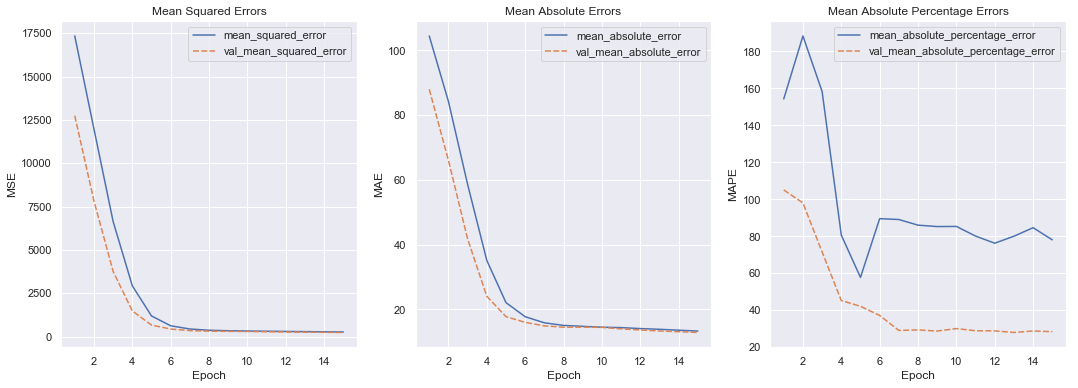

In [22]:
fig, axs = plt.subplots(ncols=3, figsize=(18,6))
sns.lineplot(data=epochs[['mean_squared_error','val_mean_squared_error']],ax=axs[0]).set(
    title='Mean Squared Errors',xlabel='Epoch',ylabel='MSE')
sns.lineplot(data=epochs[['mean_absolute_error','val_mean_absolute_error']],ax=axs[1]).set(
    title='Mean Absolute Errors',xlabel='Epoch',ylabel='MAE')
sns.lineplot(data=epochs[['mean_absolute_percentage_error',
                          'val_mean_absolute_percentage_error']],ax=axs[2]).set(
    title='Mean Absolute Percentage Errors',xlabel='Epoch',ylabel='MAPE')

[Text(0, 0.5, 'R2'), Text(0.5, 0, 'Epoch'), Text(0.5, 1.0, 'R-Squared')]

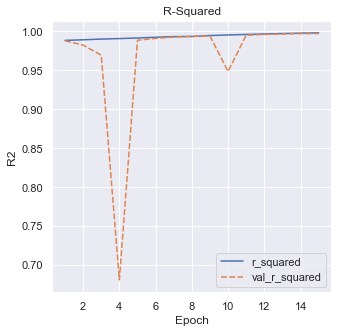

In [23]:
#This wasn't in the package, so I consulted StackExchange for something that works.
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model.compile(optimizer='adam',loss=tf.keras.losses.mean_squared_error,
              metrics=[r_squared])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test), verbose=0)
epochs = pd.DataFrame(history.history)
epochs.index = np.arange(1,16)

plt.figure(figsize=(5,5))
sns.lineplot(data=epochs[['r_squared','val_r_squared']]).set(title='R-Squared',xlabel='Epoch',ylabel='R2')

Now, we must determine how to extract probabilities and comput ROC curves using Keras if we would like to produce the Confusion Matrices, and ROC Curves. It's actually quite simple and can use many of SKLearn's methods.

First things first, we need a classification problem, layer structure, compiled sequential object, and fitted neural network to get probabilities from.

In [24]:
X, y = datasets.make_moons(n_samples=1000)
X_train, X_test, y_train_l, y_test_l = train_test_split(X, y, test_size=0.25)
y_test = to_categorical(y_test_l)
y_train = to_categorical(y_train_l)

model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(2,)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(2, activation='softmax')])

model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.losses.binary_crossentropy])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), verbose=1)

Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 0s 457us/sample - loss: 0.9141 - binary_crossentropy: 0.9141 - val_loss: 0.8152 - val_binary_crossentropy: 0.8152
Epoch 2/10
750/750 [==============================] - 0s 60us/sample - loss: 0.8009 - binary_crossentropy: 0.8009 - val_loss: 0.7303 - val_binary_crossentropy: 0.7303
Epoch 3/10
750/750 [==============================] - 0s 74us/sample - loss: 0.7156 - binary_crossentropy: 0.7156 - val_loss: 0.6685 - val_binary_crossentropy: 0.6685
Epoch 4/10
750/750 [==============================] - 0s 87us/sample - loss: 0.6510 - binary_crossentropy: 0.6510 - val_loss: 0.6222 - val_binary_crossentropy: 0.6222
Epoch 5/10
750/750 [==============================] - 0s 80us/sample - loss: 0.6005 - binary_crossentropy: 0.6005 - val_loss: 0.5835 - val_binary_crossentropy: 0.5835
Epoch 6/10
750/750 [==============================] - 0s 79us/sample - loss: 0.5579 - binary_crossentropy: 0.5579 - va

Now let's see if we are performing well.

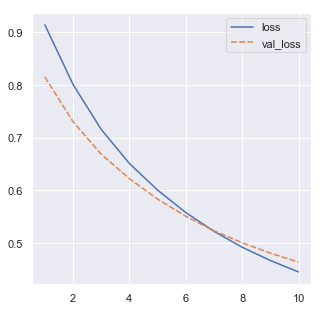

In [25]:
epochs = pd.DataFrame(history.history)
epochs.index = np.arange(1,11)
plt.figure(figsize=(5,5))
sns.lineplot(data=epochs[['loss','val_loss']])

And grab out the class predictions.

In [26]:
pred = np.array(model.predict_classes(X_test))

Then, create a confusion matrix.

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1.0, 'Confusion Matrix')]

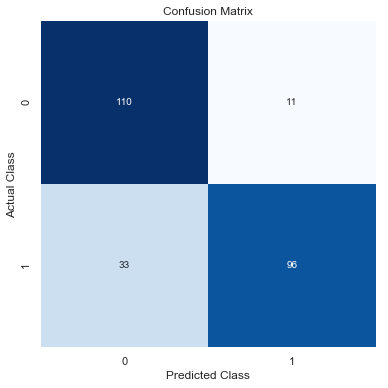

In [27]:
test_cf = pd.DataFrame(confusion_matrix(y_test_l,pred))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

Or in the multi-class scenario.

In [28]:
X, y = datasets.make_classification(n_samples=1000, n_features=15, n_informative=15,
                                    n_redundant=0,n_classes=5)
X_train, X_test, y_train_l, y_test_l = train_test_split(X, y, test_size=0.25)
y_test = to_categorical(y_test_l)
y_train = to_categorical(y_train_l)

model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(15,)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(5, activation='softmax')])

model.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy,
             metrics=[tf.keras.losses.categorical_crossentropy])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), verbose=1)

Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 0s 512us/sample - loss: 2.0109 - categorical_crossentropy: 2.0109 - val_loss: 1.8310 - val_categorical_crossentropy: 1.8310
Epoch 2/10
750/750 [==============================] - 0s 64us/sample - loss: 1.8597 - categorical_crossentropy: 1.8597 - val_loss: 1.7521 - val_categorical_crossentropy: 1.7521
Epoch 3/10
750/750 [==============================] - 0s 72us/sample - loss: 1.7583 - categorical_crossentropy: 1.7583 - val_loss: 1.6983 - val_categorical_crossentropy: 1.6983
Epoch 4/10
750/750 [==============================] - 0s 75us/sample - loss: 1.6852 - categorical_crossentropy: 1.6852 - val_loss: 1.6623 - val_categorical_crossentropy: 1.6623
Epoch 5/10
750/750 [==============================] - 0s 77us/sample - loss: 1.6350 - categorical_crossentropy: 1.6350 - val_loss: 1.6278 - val_categorical_crossentropy: 1.6278
Epoch 6/10
750/750 [==============================] - 0s 74us/sample

[Text(0, 0.5, 'Loss'),
 Text(0.5, 0, 'Epochs'),
 Text(0.5, 1.0, 'Loss over Epochs')]

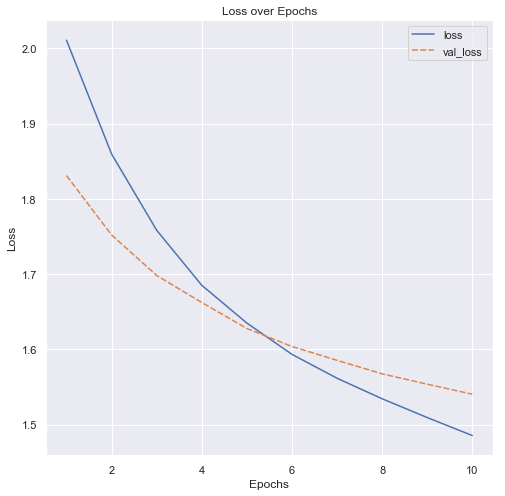

In [29]:
epochs = pd.DataFrame(history.history)
epochs.index = np.arange(1,11)
plt.figure(figsize=(8,8))
sns.lineplot(data=epochs[['loss','val_loss']]).set(title='Loss over Epochs',xlabel='Epochs',
                                                  ylabel='Loss')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1.0, 'Confusion Matrix')]

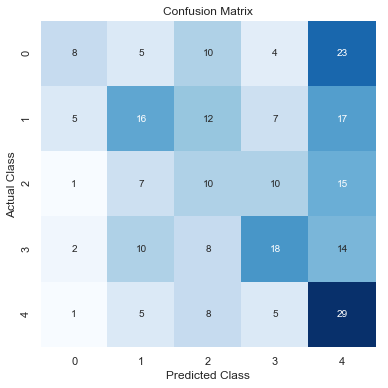

In [30]:
pred = np.array(model.predict_classes(X_test))
test_cf = pd.DataFrame(confusion_matrix(y_test_l,pred))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1.0, 'Normalized Confusion Matrix')]

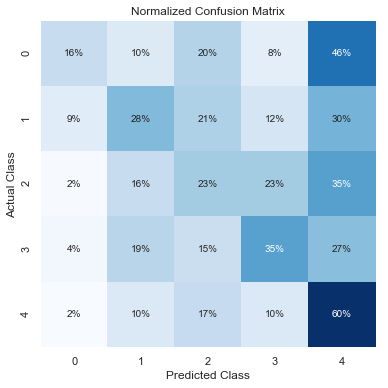

In [31]:
pred = np.array(model.predict_classes(X_test))
test_cf = confusion_matrix(y_test_l,pred)
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')

For ROC Curves, we need to grab out the curves for each class using the probabilities. Let's see how this is done.

In [32]:
#Binarize
target_b = label_binarize(y, classes=[0,1,2,3,4])
n_classes = target_b.shape[1]

#Split/Train
X_train, X_test, y_train, y_test = train_test_split(X, target_b, test_size=0.25)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), verbose=1)

#Score
y_scores = model.predict_proba(X_test)

# Compute ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 0s 62us/sample - loss: 1.4917 - categorical_crossentropy: 1.4917 - val_loss: 1.4433 - val_categorical_crossentropy: 1.4433
Epoch 2/10
750/750 [==============================] - 0s 71us/sample - loss: 1.4703 - categorical_crossentropy: 1.4703 - val_loss: 1.4306 - val_categorical_crossentropy: 1.4306
Epoch 3/10
750/750 [==============================] - 0s 71us/sample - loss: 1.4495 - categorical_crossentropy: 1.4495 - val_loss: 1.4192 - val_categorical_crossentropy: 1.4192
Epoch 4/10
750/750 [==============================] - 0s 73us/sample - loss: 1.4292 - categorical_crossentropy: 1.4292 - val_loss: 1.4069 - val_categorical_crossentropy: 1.4069
Epoch 5/10
750/750 [==============================] - 0s 71us/sample - loss: 1.4098 - categorical_crossentropy: 1.4098 - val_loss: 1.3899 - val_categorical_crossentropy: 1.3899
Epoch 6/10
750/750 [==============================] - 0s 76us/sample 

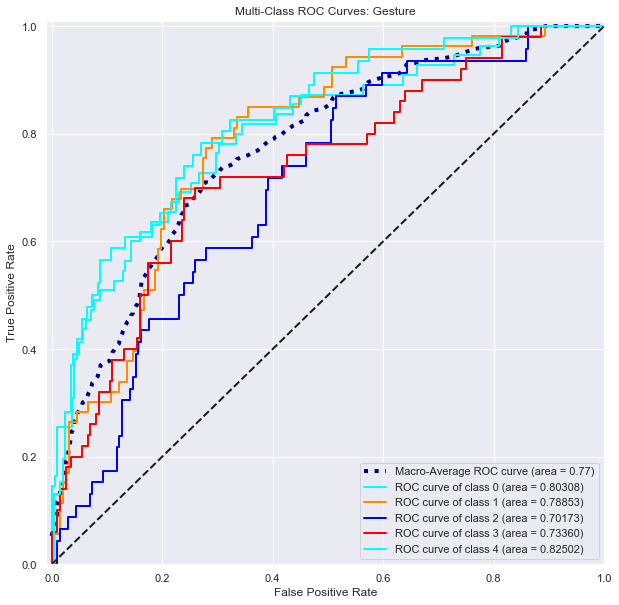

In [33]:
# Aggregate False Positive Rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate Curves
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'blue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.5f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves: Gesture')
plt.legend(loc="lower right")

## Early Stopping
Because the choice of the number of epochs to train is mostly arbitrary, it is sometimes nice to automate away this choice by asking for the model to simply stop training once it no longer is finding any progress. In the SKLearn MLP module, we found our model by stopping once the loss value did not improve by more than a very small amount for 10 epochs in a row. Let's implement this where patience is the amount of time to wait before ending the fit.

In [42]:
X, y = datasets.make_classification(n_samples=1000, n_features=15, n_informative=15,
                                    n_redundant=0,n_classes=5)
X_train, X_test, y_train_l, y_test_l = train_test_split(X, y, test_size=0.25)
y_test = to_categorical(y_test_l)
y_train = to_categorical(y_train_l)

model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(15,)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(5, activation='softmax')])

model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.losses.binary_crossentropy])

callbacks = [EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test),
                    callbacks=callbacks,verbose=3)

Train on 750 samples, validate on 250 samples
Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500


[Text(0, 0.5, 'Loss'),
 Text(0.5, 0, 'Epochs'),
 Text(0.5, 1.0, 'Loss over Epochs')]

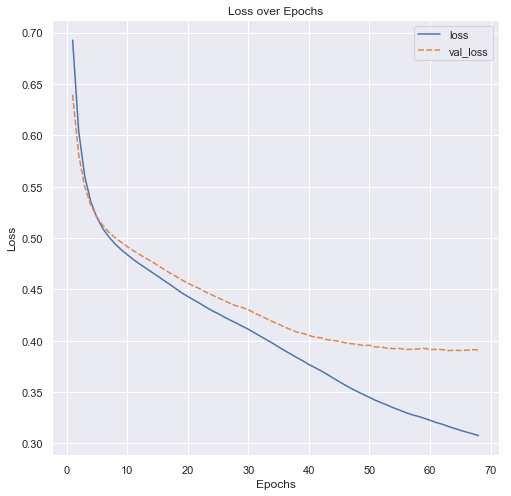

In [43]:
epochs = pd.DataFrame(history.history)
epochs.index = np.arange(1,len(epochs)+1)
plt.figure(figsize=(8,8))
sns.lineplot(data=epochs[['loss','val_loss']]).set(title='Loss over Epochs',xlabel='Epochs',
                                                  ylabel='Loss')

## DropOut Layers
For our last topic today, remember what it means to be a dense neural network. This dense is defined as the complete interconnectivity of the input layers, through the hidden layers, and out the output layer. This huge number of connections can have issues where the model could tend to overfit. So, in order to prevent this, and to allow ourselves more time to train the data. We use a dropout layers. Let's quickly make one.

In [46]:
#X, y = datasets.make_classification(n_samples=1000, n_features=15, n_informative=15,
#                                    n_redundant=0,n_classes=5)
X_train, X_test, y_train_l, y_test_l = train_test_split(X, y, test_size=0.25)
y_test = to_categorical(y_test_l)
y_train = to_categorical(y_train_l)

model = tf.keras.Sequential([layers.Dense(30, activation='relu', input_shape=(15,)),
                             layers.Dropout(rate=0.5),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(5, activation='softmax')])

model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.losses.binary_crossentropy])

callbacks = [EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test),
                    callbacks=callbacks,verbose=3)

Train on 750 samples, validate on 250 samples
Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
E

[Text(0, 0.5, 'Loss'),
 Text(0.5, 0, 'Epochs'),
 Text(0.5, 1.0, 'Loss over Epochs')]

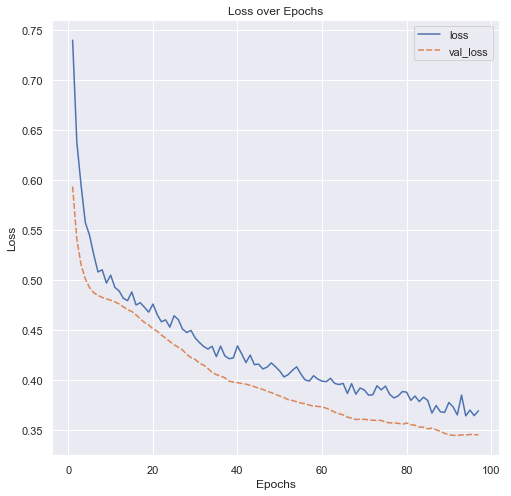

In [47]:
epochs = pd.DataFrame(history.history)
epochs.index = np.arange(1,len(epochs)+1)
plt.figure(figsize=(8,8))
sns.lineplot(data=epochs[['loss','val_loss']]).set(title='Loss over Epochs',xlabel='Epochs',
                                                  ylabel='Loss')